# COMP 7150 Assignment 1 Solution

**Due at midnight 01/31/2023**

---

**Academic misconduct**

If you use code that you did not write yourself, mention the source explicitly. If this is not done, you commit plagirism.  You can discuss, explain, get help from your classmate on how to solve a problem.  If the code or writing is not yours, it is plagiarism.   Plagiarism results in a grade of 0 for the assignment.  There might be an additional penalty and report to the department and college.

Please review additional information about academic misconduct: https://www.memphis.edu/osa/students/academic-misconduct.php


**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.
* Answering the question in English: 30%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-30%
    + Not answering the question in English: 0%.
* Code: 60%
    + Code is correct and is executable and demonstrated to be correct: 60%
    + Code is correct and is not executable or is not demonstrated to be correct: 40%
    + Code misses minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%

**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

---

**Information**

Datasets you will use for this assignment are: tips.csv, iris.csv

Each question is worth 20 points.

---

**Problem 1**

For each iris species, select all data whose petal widths are greater than the overall average (of all species).

Report on the counts and averages of petal widths of each species.

ANSWER:

Finding:
+ No setosa irises have petal width larger than average.
+ 40 out of 50 versicolor irises are larger than average, with average 1.4.
+ All 50 virginica irises are larger than average, with average of ~1.2.

We went through these steps:
+ Compute the average petal width.
+ Select all data with petal width larger than the average petal width.
+ Group the selected data into separate species and calculate the mean & count for each species.


In [1]:
import pandas
iris = pandas.read_csv('../Datasets/iris.csv')
average_pw = iris['PetalWidth'].mean()
print('Average petal width is:', average_pw)
selected = iris[ (iris['PetalWidth'] > average_pw) ]
selected.groupby('Species').agg(['mean','count'])['PetalWidth']

Average petal width is: 1.199333333333334


,mean,count
Species,,
versicolor,1.400,40
virginica,2.026,50


---

**Problem 2**

Are tip percentages "normal", i.e. is it normally distributed?

Use the shapiro statistical test to answer this question.

Additionally, draw the distribution of tip percentages to answer this question.


ANSWER:

Finding:
+ Tip percentages is not normally distributed.
+ The shapiro test of tip percentages has pvalue less than 0.05.  This means that assuming tip percentages is normally distributed, the probability that we observed the data in tip_perc is very small (less than 0.05).  Therefore, we don't accept the hypothesis of tip percentages being normally distributed.
+ Visually, we suspect that the very high tip percentages is the reason that the distribution is not normal.  Note: this can be confirmed via another shapiro test.


We went through these steps:
+ Create a new column "tip_perc", the tip percentages.
+ Use the shapiro test and the pvalue to determine if tip_perc is normally distributed.
+ Use seaborn.displot to visualize the distribution of tip_perc.


In [3]:
import pandas
tips = pandas.read_csv('../Datasets/tips.csv')
tips['tip_perc'] = 100*tips['tip']/tips['total_bill']

from scipy.stats import shapiro
stat, pvalue = shapiro(tips['tip_perc'])
print('pvalue of shapiro test:', pvalue, pvalue < 0.05)

pvalue of shapiro test: 5.118165150920833e-17 True


Additional note: if we disregard high tip percentages, the rest is closer to normal.

In [8]:
shapiro(tips[tips['tip_perc']<35]['tip_perc'])

ShapiroResult(statistic=0.9913750886917114, pvalue=0.16531586647033691)

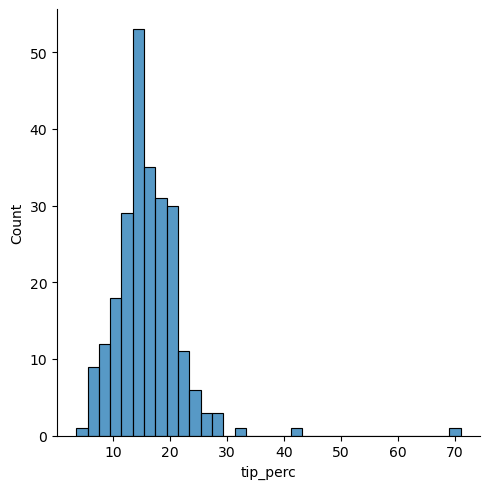

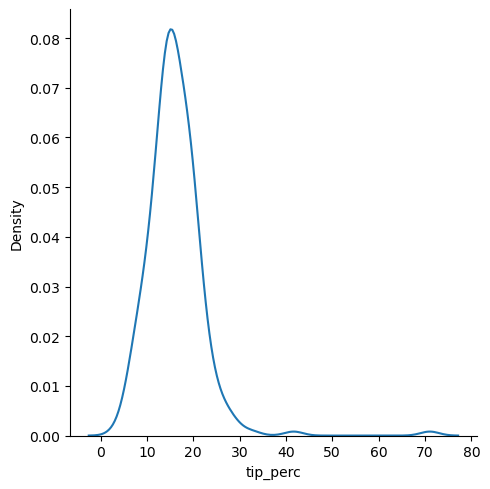

In [52]:
import seaborn
from matplotlib import pyplot
seaborn.displot(data=tips, x='tip_perc')
pyplot.show()
seaborn.displot(data=tips, x='tip_perc', kind='kde')
pyplot.show()

---

**Problem 3**

Use Python, do not use Pandas, to do this problem.

Compare the average amount of tips and average percentage of tips between males and females on weekends.

A comparison must include an explanation of the code, a report of the finding, and a discussion or conclusion based on the finding.

ANSWER:

Finding:
+ Average tip amount of males is higher than that of females.  However, the tip percentage of females is similar to that of males.

We went through these steps:
+ Read the data info lines and loop through each line.
+ In each line, collect total bill, tip, gender, and date.  Total bill and tip are converted to float.  
+ In the loop, we keep track of the total bill, tip, and count for males and females on Sunday or Saturday.
+ We use a dictionary to keep track of this information.

In [9]:
import requests

# lines = open('../Datasets/tips.csv').readlines()

# or using code in notebook 2.
tips_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
result = requests.get(tips_url)
lines = result.text.strip().split('\n')
info = {
    'Male' : [0, 0, 0],   
    'Female' : [0, 0, 0],
}
for i in range(len(lines)):
    # print(lines[i])
    if i > 0:
        items = lines[i].split(',')
        total_bill = float(items[0])
        tip = float(items[1])
        gender = items[2].strip('"')
        date = items[4].strip('"')
        if date in ['Sun','Sat']:
            info[gender][0] += total_bill
            info[gender][1] += tip
            info[gender][2] += 1     

print('Collected information:', info)
print()
print('Average amount of tip of males:', info['Male'][1]/info['Male'][2])
print('Average amount of tip of females:', info['Female'][1]/info['Female'][2])
print()
print('Average tip percentages of males:', info['Male'][1]/info['Male'][0])
print('Average tip percentages of females:', info['Female'][1]/info['Female'][0])



Collected information: {'Male': [2496.810000000001, 368.73, 117], 'Female': [908.75, 139.05999999999997, 46]}

Average amount of tip of males: 3.1515384615384616
Average amount of tip of females: 3.023043478260869

Average tip percentages of males: 0.14768044024174842
Average tip percentages of females: 0.1530233837689133


---

**Problem 4**

Visualize the distribution of tip percentages in relation to (or as a function of)  total bill.

Discuss the finding.  Specifically, discuss the concentration of tip percentages and its relation to total bill.

ANSWER:

Finding:
+ Most tip percentages and total bill concentrate approximately between 10-20 for both variables.

We went through these steps:
+ Define a new column "tip_perc", similarly to the problems above.
+ Use seaborn.displot to visualize the distribution of tip percentages and its relation to total bill.
    + To view the concentration, it's best to use "kde".
    + There's a subtlety in specifying which variable for x and for y.  Conventionally, we think "y is a function of x". For this reason, it is a little better to specify total_bill as x.

In [14]:
# import pandas, seaborn
# from matplotlib import pyplot

# tips = pandas.read_csv('../Datasets/tips.csv')
# tips['tip_perc'] = 100*tips['tip']/tips['total_bill']
# seaborn.relplot(data=tips, x='total_bill', y='tip_perc', alpha=0.5)
# pyplot.show()

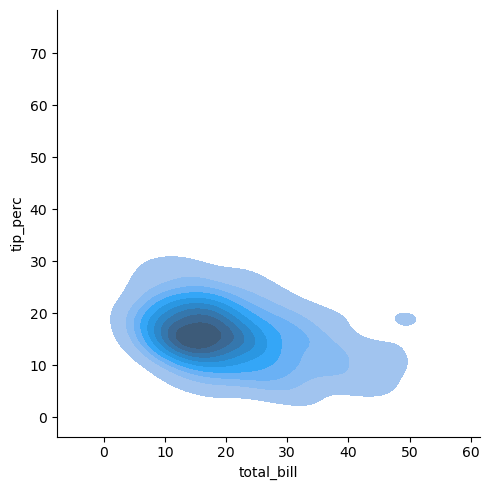

In [16]:
import pandas, seaborn
from matplotlib import pyplot

tips = pandas.read_csv('../Datasets/tips.csv')
tips['tip_perc'] = 100*tips['tip']/tips['total_bill']
seaborn.displot(data=tips, x='total_bill', y='tip_perc', kind='kde', fill=True)
pyplot.show()


---

**Problem 5**

Describe the distinguishable characteristics of big tippers.  Examine all features/attributes and describe the disguishable characteristics (based on your observation) of at least 3 features.

For concreteness, we'll define big tippers as people whose tip more than the average plus 1.5 times standard deviation of tip percentage.



ANSWER:

Finding:
+ There are 10 big tippers, based on this definition.
+ Distinguishing characteristics of big tippers include:
    + The majority is smokers (70%).
    + The majority happens on the weekend (70%).
    + The majority is female (60%).

We went through these steps:
+ Calculate mean and standard deviation of tip percentages.
+ Define t = mean + 1.5 std as a threshold for determining big tippers.
+ Select big tippers based on this threshold.

In [18]:
import pandas, seaborn
from matplotlib import pyplot

tips = pandas.read_csv('../Datasets/tips.csv')
tips['tip_perc'] = 100*tips['tip']/tips['total_bill']

mean_tip_perc = tips['tip_perc'].mean()
std_tip_perc = tips['tip_perc'].std()
t = mean_tip_perc + 1.5*std_tip_perc

print('Mean and standard deviation of tip percentages:', mean_tip_perc, std_tip_perc)
print('Threshold that determines "big tippers":', t)
print()

Q = (tips['tip_perc'] > t) 
big_tippers = tips[Q].sort_values(by='tip_perc', ascending=False)

print('There are', len(big_tippers), 'big tippers.')
print(big_tippers)

Mean and standard deviation of tip percentages: 16.080258172250463 6.1072204191571915
Threshold that determines "big tippers": 25.24108880098625

There are 10 big tippers.
     total_bill   tip     sex smoker   day    time  size   tip_perc
172        7.25  5.15    Male    Yes   Sun  Dinner     2  71.034483
178        9.60  4.00  Female    Yes   Sun  Dinner     2  41.666667
67         3.07  1.00  Female    Yes   Sat  Dinner     1  32.573290
232       11.61  3.39    Male     No   Sat  Dinner     2  29.198966
183       23.17  6.50    Male    Yes   Sun  Dinner     4  28.053517
109       14.31  4.00  Female    Yes   Sat  Dinner     2  27.952481
149        7.51  2.00    Male     No  Thur   Lunch     2  26.631158
93        16.32  4.30  Female    Yes   Fri  Dinner     2  26.348039
221       13.42  3.48  Female    Yes   Fri   Lunch     2  25.931446
51        10.29  2.60  Female     No   Sun  Dinner     2  25.267250
